<a href="https://colab.research.google.com/github/PhonxayMax/5_Deep-Learning-with-Python_Francois-Chollet/blob/main/CH4_chapter04_getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

np.int64(1)

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.6653 - loss: 0.6226 - val_accuracy: 0.8266 - val_loss: 0.4561
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8850 - loss: 0.3910 - val_accuracy: 0.8852 - val_loss: 0.3450
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9144 - loss: 0.2901 - val_accuracy: 0.8860 - val_loss: 0.3074
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9350 - loss: 0.2202 - val_accuracy: 0.8856 - val_loss: 0.2907
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9487 - loss: 0.1805 - val_accuracy: 0.8872 - val_loss: 0.2765
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9541 - loss: 0.1534 - val_accuracy: 0.8741 - val_loss: 0.3174
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9612 - loss: 0.1320 - val_accuracy: 0.8859 - val_loss: 0.2853
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9670 - loss: 0.1151 - val_accuracy: 0.8824 - 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

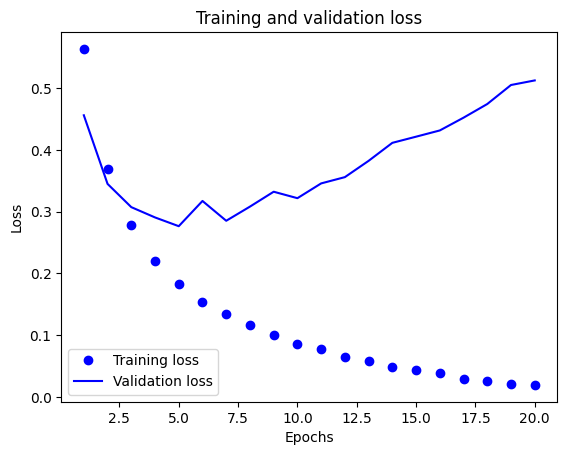

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

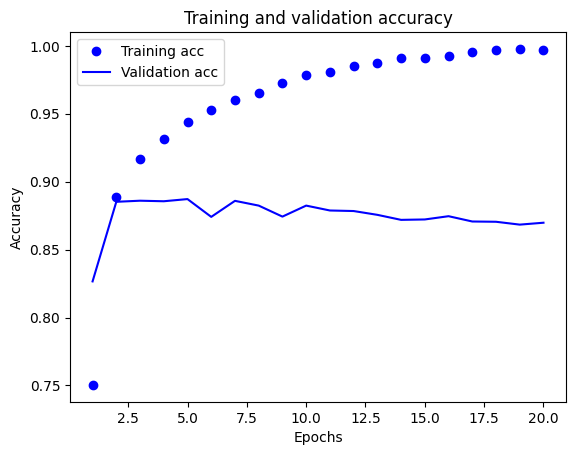

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7303 - loss: 0.5625
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9019 - loss: 0.2927
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9237 - loss: 0.2174
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9365 - loss: 0.1835
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8803 - loss: 0.2926


In [18]:
results

[0.2930881381034851, 0.8817200064659119]

### Using a trained model to generate predictions on new data

In [19]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.16366524],
       [0.99888486],
       [0.826417  ],
       ...,
       [0.08572505],
       [0.04799086],
       [0.55974156]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [20]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
print(len(train_data))
print(train_data[:5])

8982
[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67

In [22]:
print(len(train_labels))
print(train_labels[:5])

8982
[3 4 3 4 4]


In [23]:
len(test_data)
print(test_data[:5])

[list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12])
 list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260, 951, 6607, 

In [24]:
print(len(test_labels))
print(test_labels[:5])

2246
[ 3 10  1  4  4]


In [25]:
from tensorflow.keras.datasets import reuters

# Load dataset (limit to top 10,000 words)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Print lengths of train/test data
print(f"Number of training samples     : {len(train_data)}")
print(f"Number of training labels      : {len(train_labels)}")
print(f"Number of testing samples      : {len(test_data)}")
print(f"Number of testing labels       : {len(test_labels)}\n")

# Print first 5 training samples
print("First 5 training data samples (word indices):")
for i, sample in enumerate(train_data[:5]):
    print(f"Sample {i}: {sample}")

print("\nFirst 5 training labels:")
print(train_labels[:5])

# Print first 5 testing samples
print("\nFirst 5 testing data samples (word indices):")
for i, sample in enumerate(test_data[:5]):
    print(f"Sample {i}: {sample}")

print("\nFirst 5 testing labels:")
print(test_labels[:5])


Number of training samples     : 8982
Number of training labels      : 8982
Number of testing samples      : 2246
Number of testing labels       : 2246

First 5 training data samples (word indices):
Sample 0: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Sample 1: [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
Sample 2: [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704

In [26]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

**Decoding newswires back to text**

In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
print(decoded_newswire)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [28]:
from tensorflow.keras.datasets import reuters

# Load dataset (only top 10,000 words)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Load the word index mapping
word_index = reuters.get_word_index()

# Reverse the word index to get words back from indices
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode function for one sample
def decode_newswire(encoded_newswire):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_newswire])

# Print first 5 decoded newswires
print("First 5 decoded training newswires:\n")
for i in range(5):
    print(f"Newswire {i} (Label = {train_labels[i]}):")
    print(decode_newswire(train_data[i]))
    print("\n" + "-"*80 + "\n")


First 5 decoded training newswires:

Newswire 0 (Label = 3):
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

--------------------------------------------------------------------------------

Newswire 1 (Label = 4):
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3

--------------------------------------------------------------------------------

Newswire 2 (Label = 3):
? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 ct

In [29]:
train_labels[10]

np.int64(3)

### Preparing the data

**Encoding the input data**

**Encoding the labels**

In [30]:
import numpy as np
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results
x_train = multi_hot_encode(train_data, num_classes=10000)
x_test = multi_hot_encode(test_data, num_classes=10000)

In [31]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


***You can change x_train[i][:100] to x_train[i] to show the full 10,000-dim vector, but it’s very long.***

In [32]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

# 1. Load dataset (only top 10,000 words)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 2. Load the word index mapping
word_index = reuters.get_word_index()

# 3. Reverse the word index to get words back from indices
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 4. Decode function to turn indices into words
def decode_newswire(encoded_newswire):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_newswire])

# 5. Multi-hot encode function for inputs
def multi_hot_encode(sequences, num_classes=10000):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 6. Multi-hot encode the input datasets
x_train = multi_hot_encode(train_data)
x_test = multi_hot_encode(test_data)

# 7. One-hot encode the label datasets
y_train = to_categorical(train_labels, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)

# 8. Print first 5 samples
print("First 5 Training Samples (Word Indices → Decoded Text → Multi-hot Encoding → One-hot Label):\n")

for i in range(5):
    print(f"📝 Newswire {i} (Label Index = {train_labels[i]})")

    # Original word indices
    print("🔢 Original word indices:")
    print(train_data[i])

    # Decoded newswire
    print("\n🔤 Decoded newswire:")
    print(decode_newswire(train_data[i]))

    # Multi-hot encoded input vector
    print("\n🧠 Multi-hot encoded input vector (first 100 elements):")
    print(x_train[i][:100])

    # One-hot encoded label vector
    print("\n🎯 One-hot encoded label vector:")
    print(y_train[i])  # Full 46-length vector

    print("\n" + "-" * 120 + "\n")


First 5 Training Samples (Word Indices → Decoded Text → Multi-hot Encoding → One-hot Label):

📝 Newswire 0 (Label Index = 3)
🔢 Original word indices:
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

🔤 Decoded newswire:
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

🧠 Multi-hot encoded input vector (first 100 elements):
[0. 1. 1. 0. 1. 1. 1. 1.

### Building your model

**Model definition**

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [34]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4027 - loss: 3.2110 - val_accuracy: 0.6140 - val_loss: 1.8452
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6575 - loss: 1.6395 - val_accuracy: 0.6700 - val_loss: 1.4185
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7246 - loss: 1.2378 - val_accuracy: 0.7250 - val_loss: 1.2131
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7764 - loss: 1.0038 - val_accuracy: 0.7520 - val_loss: 1.1074
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8117 - loss: 0.8354 - val_accuracy: 0.7730 - val_loss: 1.0326
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8517 - loss: 0.7064 - val_accuracy: 0.7930 - val_loss: 0.9700
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8814 - loss: 0.5861 - val_accuracy: 0.8040 - val_loss: 0.9176
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8951 - loss: 0.4939 - val_accuracy: 0.7990 - 

**Plotting the training and validation loss**

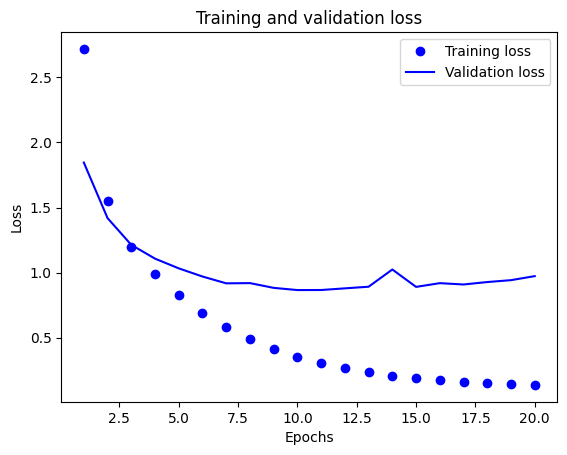

In [37]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

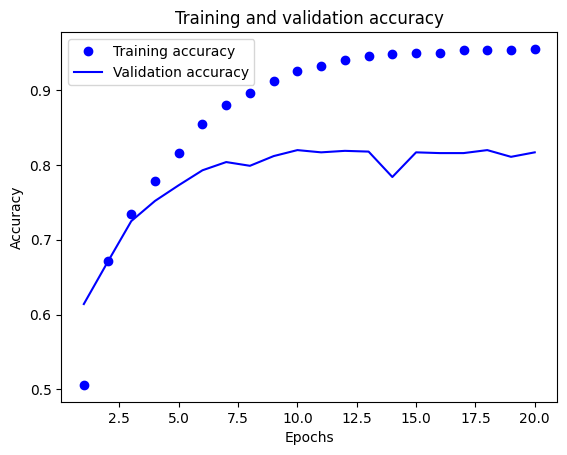

In [38]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

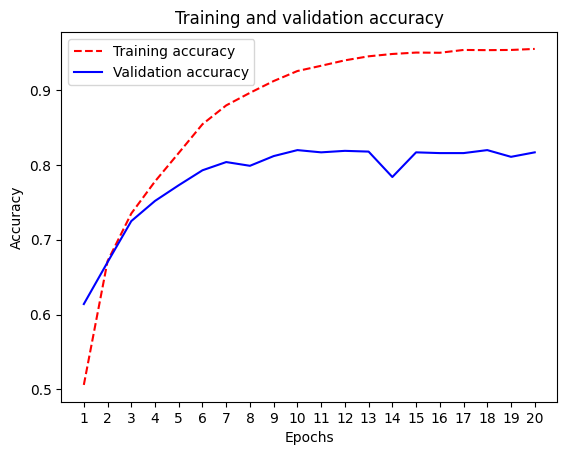

In [41]:
import matplotlib.pyplot as plt

plt.clf()  # Clear the figure

# Access the correct metric names from the history object
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# Plot the training and validation accuracy curves
plt.plot(epochs, acc, "r--", label="Training accuracy")  # Plot training accuracy
plt.plot(epochs, val_acc, "b", label="Validation accuracy")  # Plot validation accuracy

plt.title("Training and validation accuracy")  # Set the title of the plot
plt.xlabel("Epochs")  # Label the x-axis as "Epochs"
plt.xticks(epochs)  # Set x-axis ticks to represent epochs
plt.ylabel("Accuracy")  # Label the y-axis as "Accuracy"
plt.legend()  # Show the legend to distinguish training and validation curves
plt.savefig("reuters_accuracy_plot.png", dpi=300)  # Save the plot as a PNG image
plt.show()  # Display the plot

**Retraining a model from scratch**

In [42]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4074 - loss: 3.1499
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6806 - loss: 1.5544
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7543 - loss: 1.1510
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8036 - loss: 0.9146
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8391 - loss: 0.7483
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8624 - loss: 0.6328
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8918 - loss: 0.5189
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9104 - loss: 0.4289
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9294 - loss: 0.3540
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7929 - loss: 0.9129


In [43]:
results

[0.9244020581245422, 0.7925200462341309]

In [44]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.17586821015138024)

### Generating predictions on new data

In [45]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [46]:
predictions[0].shape

(46,)

In [47]:
np.sum(predictions[0])

np.float32(1.0000001)

In [48]:
np.argmax(predictions[0])

np.int64(3)

### A different way to handle the labels and the loss

In [49]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [50]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [51]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1107 - loss: 3.3252 - val_accuracy: 0.3210 - val_loss: 2.2988
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5097 - loss: 2.0773 - val_accuracy: 0.5970 - val_loss: 1.6175
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6164 - loss: 1.5158 - val_accuracy: 0.6090 - val_loss: 1.5052
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6527 - loss: 1.3685 - val_accuracy: 0.6540 - val_loss: 1.4321
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6811 - loss: 1.2540 - val_accuracy: 0.6530 - val_loss: 1.4157
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6949 - loss: 1.1673 - val_accuracy: 0.6580 - val_loss: 1.3905
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7001 - loss: 1.1014 - val_accuracy: 0.6690 - val_loss: 1.3771
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7006 - loss: 1.0362 - val_accuracy: 0.6720 - v

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [63]:
from tensorflow.keras.datasets import california_housing
(train_data, train_targets), (test_data, test_targets) = california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [64]:
train_data.shape

(16512, 8)

In [65]:
print(train_data[0])

[-118.27     34.09     52.     2327.      555.     1048.      491.
    3.7847]


In [66]:
test_data.shape

(4128, 8)

In [67]:
train_targets

array([252300., 146900., 290900., ..., 500001., 499000., 238100.],
      dtype=float32)

In [69]:
# 2. Describe the shapes of the data
print("▶️ Training data shape :", train_data.shape)
print("▶️ Training target shape :", train_targets.shape)
print("▶️ Test data shape     :", test_data.shape)
print("▶️ Test target shape   :", test_targets.shape)
# 3. Preview a few samples
# First 3 samples
for i in range(3):
    print(f"\n📦 Sample {i+1}")
    print("Features :", train_data[i])
    print("Target (Median price): $", train_targets[i])
#4. Check value range of house prices
print("\n💰 Price range (in dollars)")
print("Minimum :", np.min(train_targets))
print("Maximum :", np.max(train_targets))
print("Mean    :", np.mean(train_targets))
# 5. Add headers for clarity (optional)
column_names = [
    "Longitude", "Latitude", "Housing Age", "Population",
    "Households", "Median Income", "Total Rooms", "Total Bedrooms"
]

print("\n📊 Column names:")
for idx, name in enumerate(column_names):
    print(f"{idx + 1}. {name}")


▶️ Training data shape : (16512, 8)
▶️ Training target shape : (16512,)
▶️ Test data shape     : (4128, 8)
▶️ Test target shape   : (4128,)

📦 Sample 1
Features : [-118.27     34.09     52.     2327.      555.     1048.      491.
    3.7847]
Target (Median price): $ 252300.0

📦 Sample 2
Features : [-118.36     33.96     21.     1802.      556.     1286.      557.
    2.7284]
Target (Median price): $ 146900.0

📦 Sample 3
Features : [-122.39     37.76     52.     1877.      427.      712.      398.
    3.9722]
Target (Median price): $ 290900.0

💰 Price range (in dollars)
Minimum : 14999.0
Maximum : 500001.0
Mean    : 206796.44

📊 Column names:
1. Longitude
2. Latitude
3. Housing Age
4. Population
5. Households
6. Median Income
7. Total Rooms
8. Total Bedrooms


In [71]:
#✅ Step-by-step using Pandas
#🧩 1. Load and convert to DataFrame
import pandas as pd
from keras.datasets import california_housing

# Load the dataset
(train_data, train_targets), (test_data, test_targets) = california_housing.load_data(version="small")

# Column names from dataset description
column_names = [
    "Longitude", "Latitude", "HousingAge", "Population",
    "Households", "MedianIncome", "TotalRooms", "TotalBedrooms"
]

# Convert to DataFrame
train_df = pd.DataFrame(train_data, columns=column_names)
train_df["MedianHouseValue"] = train_targets  # Add target as a column


In [76]:
#📋 2. Inspect the dataset
train_df.head()

,Longitude,Latitude,HousingAge,Population,Households,MedianIncome,TotalRooms,TotalBedrooms,MedianHouseValue
0,-122.239998,37.730000,21.0,7031.0,1249.0,2930.0,1235.0,4.5213,228400.0
1,-122.279999,37.849998,48.0,2063.0,484.0,1054.0,466.0,2.2625,132900.0
2,-122.290001,37.820000,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0
3,-122.290001,37.810001,46.0,935.0,297.0,582.0,277.0,0.7286,95200.0
4,-122.180000,37.759998,37.0,1575.0,358.0,933.0,320.0,2.2917,107000.0


In [77]:
#🧮 3. Summary statistics
train_df.describe()

,Longitude,Latitude,HousingAge,Population,Households,MedianIncome,TotalRooms,TotalBedrooms,MedianHouseValue
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,-122.230988,37.807083,44.429165,1976.070801,421.812500,994.664612,397.750000,3.526583,204178.562500
std,0.051248,0.048392,9.675271,1477.887207,319.735168,663.725586,299.229401,1.983737,101688.765625
min,-122.330002,37.689999,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,60000.000000
25%,-122.269997,37.770000,40.000000,1169.750000,242.250000,608.500000,236.000000,2.170775,119400.000000
50%,-122.239998,37.799999,49.000000,1695.000000,365.500000,873.500000,340.000000,2.971000,182650.000000
75%,-122.199997,37.849998,52.000000,2375.250000,482.500000,1171.500000,466.250000,4.589300,269550.000000
max,-122.059998,37.900002,52.000000,18634.000000,2885.000000,7427.000000,2718.000000,13.499000,500001.000000


In [78]:
#📊 4. Check for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         480 non-null    float32
 1   Latitude          480 non-null    float32
 2   HousingAge        480 non-null    float32
 3   Population        480 non-null    float32
 4   Households        480 non-null    float32
 5   MedianIncome      480 non-null    float32
 6   TotalRooms        480 non-null    float32
 7   TotalBedrooms     480 non-null    float32
 8   MedianHouseValue  480 non-null    float32
dtypes: float32(9)
memory usage: 17.0 KB


In [80]:
#📌 5. Info about data types and memory usage
train_df.dtypes

,0
Longitude,float32
Latitude,float32
HousingAge,float32
Population,float32
Households,float32
MedianIncome,float32
TotalRooms,float32
TotalBedrooms,float32
MedianHouseValue,float32


### Preparing the data

**Normalizing the data**

In [81]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [83]:
#✅ Step-by-step: Normalize with NumPy → Wrap back in a Pandas DataFrame
#🧩 1. Load and normalize using NumPy (as before)
import pandas as pd
from keras.datasets import california_housing

# Load data
(train_data, train_targets), (test_data, test_targets) = california_housing.load_data(version="small")

# Column names
columns = [
    "Longitude", "Latitude", "HousingAge", "Population",
    "Households", "MedianIncome", "TotalRooms", "TotalBedrooms"
]

# Normalize using NumPy
import numpy as np
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

x_train = (train_data - mean) / std
x_test = (test_data - mean) / std


In [85]:
#🧾 2. Convert back to clean Pandas DataFrames
# Convert back to DataFrame after normalization
train_df_norm = pd.DataFrame(x_train, columns=columns)
train_df_norm["MedianHouseValue"] = train_targets

test_df_norm = pd.DataFrame(x_test, columns=columns)
test_df_norm["MedianHouseValue"] = test_targets

In [88]:
#📋 3. Inspect normalized data
train_df_norm.head()


Summary statistics (mean ~ 0, std ~ 1):


,Longitude,Latitude,HousingAge,Population,Households,MedianIncome,TotalRooms,TotalBedrooms
count,480.000000,480.000000,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,0.000016,0.000558,1.986821e-07,2.483527e-08,-1.986822e-09,-3.774961e-08,9.934108e-09,9.298325e-07
std,1.001043,1.001042,1.001044e+00,1.001044e+00,1.001043e+00,1.001043e+00,1.001042e+00,1.001043e+00
min,-1.934219,-2.421464,-4.389895e+00,-1.330359e+00,-1.308109e+00,-1.473024e+00,-1.307217e+00,-1.527339e+00
25%,-0.762123,-0.766542,-4.582596e-01,-5.461594e-01,-5.621835e-01,-5.824206e-01,-5.411192e-01,-6.841739e-01
50%,-0.176150,-0.145985,4.729173e-01,-1.903826e-01,-1.763061e-01,-1.827427e-01,-1.931971e-01,-2.803602e-01
75%,0.605198,0.888302,7.833097e-01,2.703830e-01,1.900036e-01,2.667064e-01,2.291602e-01,5.362746e-01
max,3.339840,1.922668,7.833097e-01,1.128321e+01,7.711874e+00,9.701367e+00,7.762174e+00,5.032332e+00


In [89]:
print("\nSummary statistics (mean ~ 0, std ~ 1):")
train_df_norm[columns].describe()


Summary statistics (mean ~ 0, std ~ 1):


,Longitude,Latitude,HousingAge,Population,Households,MedianIncome,TotalRooms,TotalBedrooms
count,480.000000,480.000000,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,0.000016,0.000558,1.986821e-07,2.483527e-08,-1.986822e-09,-3.774961e-08,9.934108e-09,9.298325e-07
std,1.001043,1.001042,1.001044e+00,1.001044e+00,1.001043e+00,1.001043e+00,1.001042e+00,1.001043e+00
min,-1.934219,-2.421464,-4.389895e+00,-1.330359e+00,-1.308109e+00,-1.473024e+00,-1.307217e+00,-1.527339e+00
25%,-0.762123,-0.766542,-4.582596e-01,-5.461594e-01,-5.621835e-01,-5.824206e-01,-5.411192e-01,-6.841739e-01
50%,-0.176150,-0.145985,4.729173e-01,-1.903826e-01,-1.763061e-01,-1.827427e-01,-1.931971e-01,-2.803602e-01
75%,0.605198,0.888302,7.833097e-01,2.703830e-01,1.900036e-01,2.667064e-01,2.291602e-01,5.362746e-01
max,3.339840,1.922668,7.833097e-01,1.128321e+01,7.711874e+00,9.701367e+00,7.762174e+00,5.032332e+00


### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary